In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2nd-step.csv')

automatic    12558
manual        5823
Name: Transmission, dtype: int64


<Axes: xlabel='Transmission', ylabel='Price'>

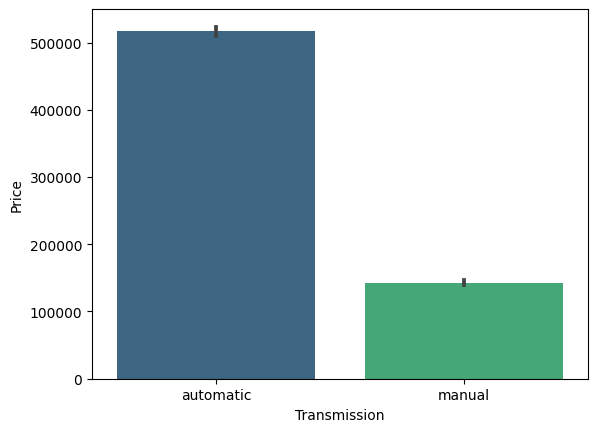

In [4]:
print(df.Transmission.value_counts())
sns.barplot(x = df["Transmission"], y = df["Price"] , palette='viridis')

gas            17844
natural gas      285
diesel           252
Name: Fuel, dtype: int64


<Axes: xlabel='Fuel', ylabel='Price'>

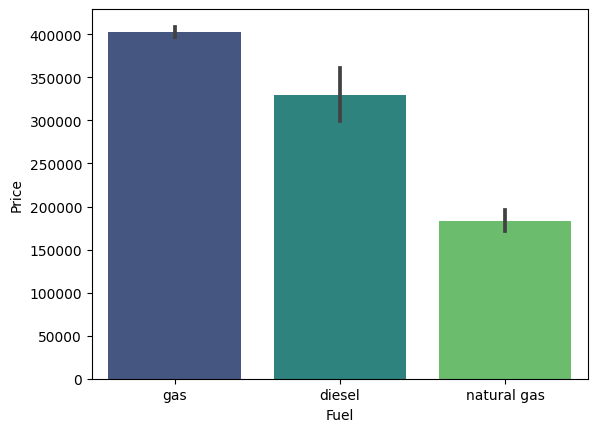

In [5]:
print(df.Fuel.value_counts())
sns.barplot(x = df["Fuel"], y = df["Price"] , palette='viridis')

<Axes: xlabel='Make', ylabel='Price'>

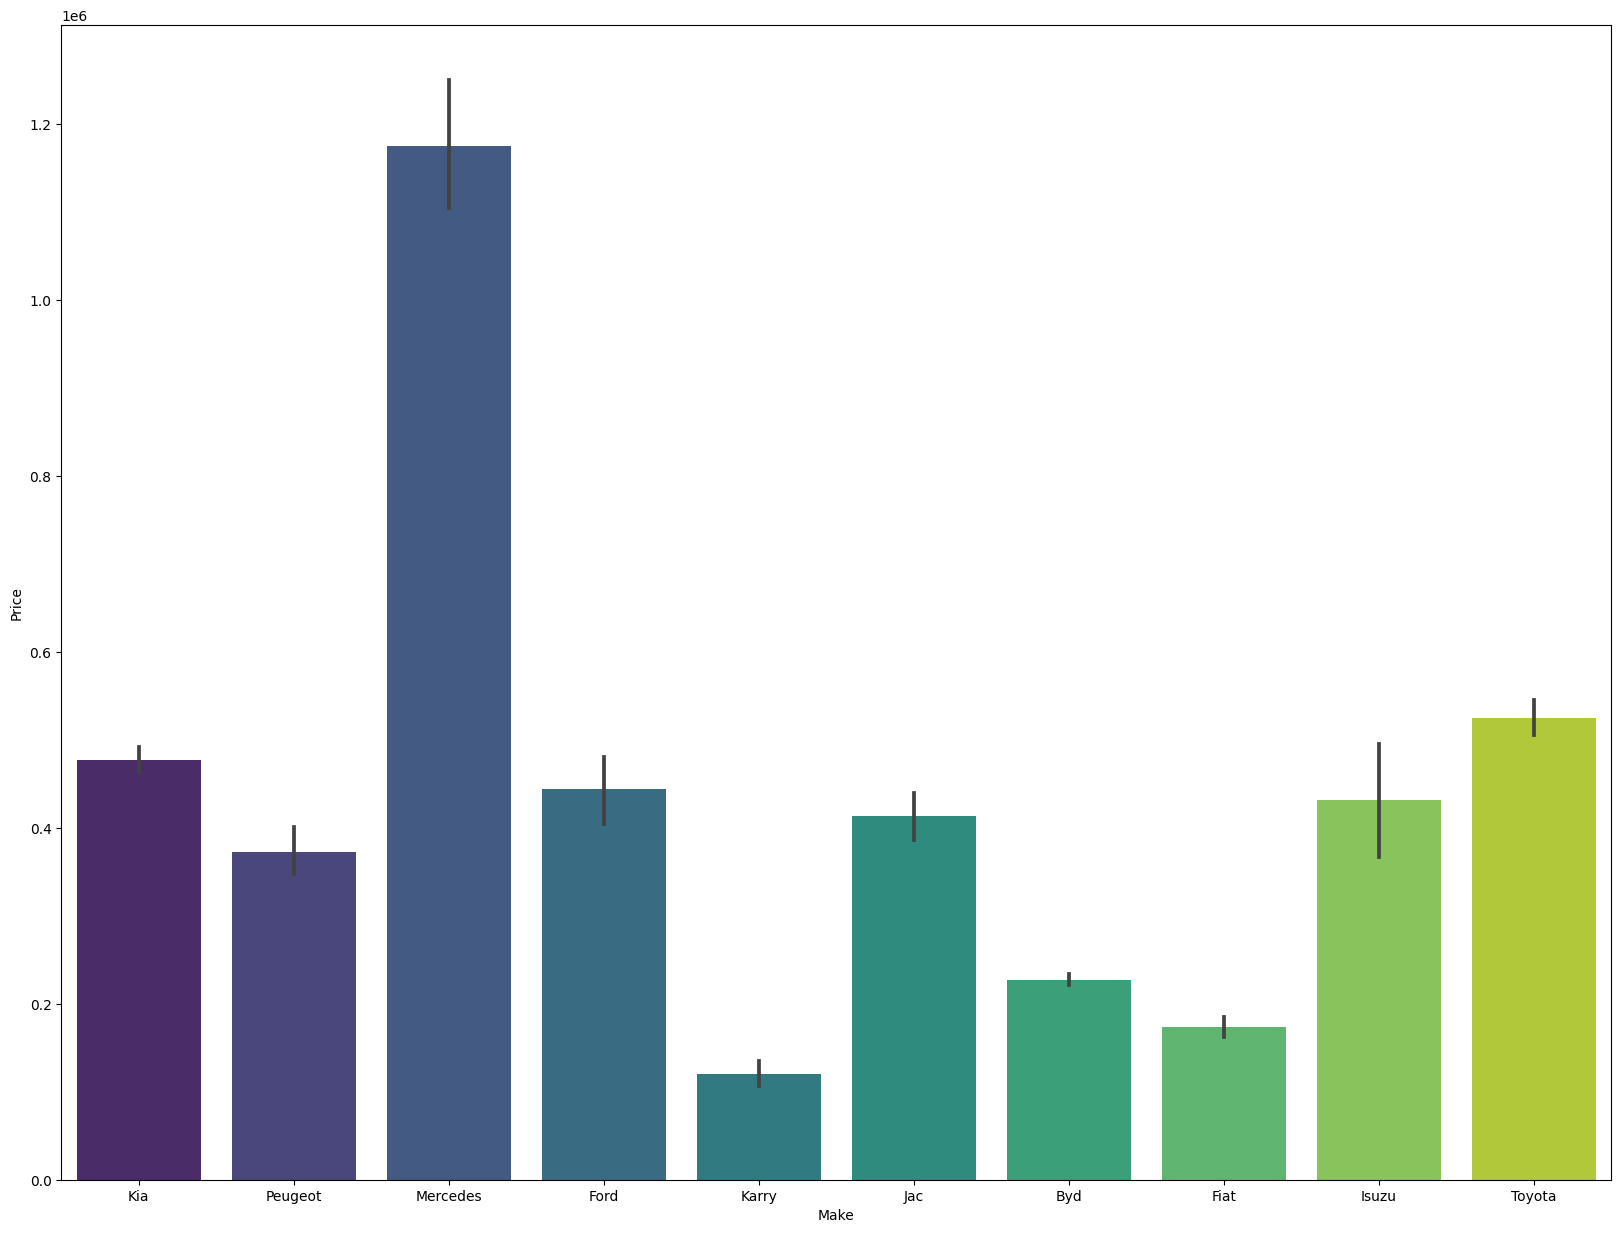

In [78]:
#explore prices by makes
makes = df['Make'].unique().tolist()

import random
sample = random.choices(makes, k=10)
df2 = df[df['Make'] == 'Kia']

for m in sample:
    df1 =df[df['Make'] == m]
    df2 = df2.merge(df1, how='outer')
    
plt.figure(figsize=(20,15))
sns.barplot(x = df2["Make"], y = df2["Price"] , palette='viridis')

<Axes: xlabel='Model', ylabel='Price'>

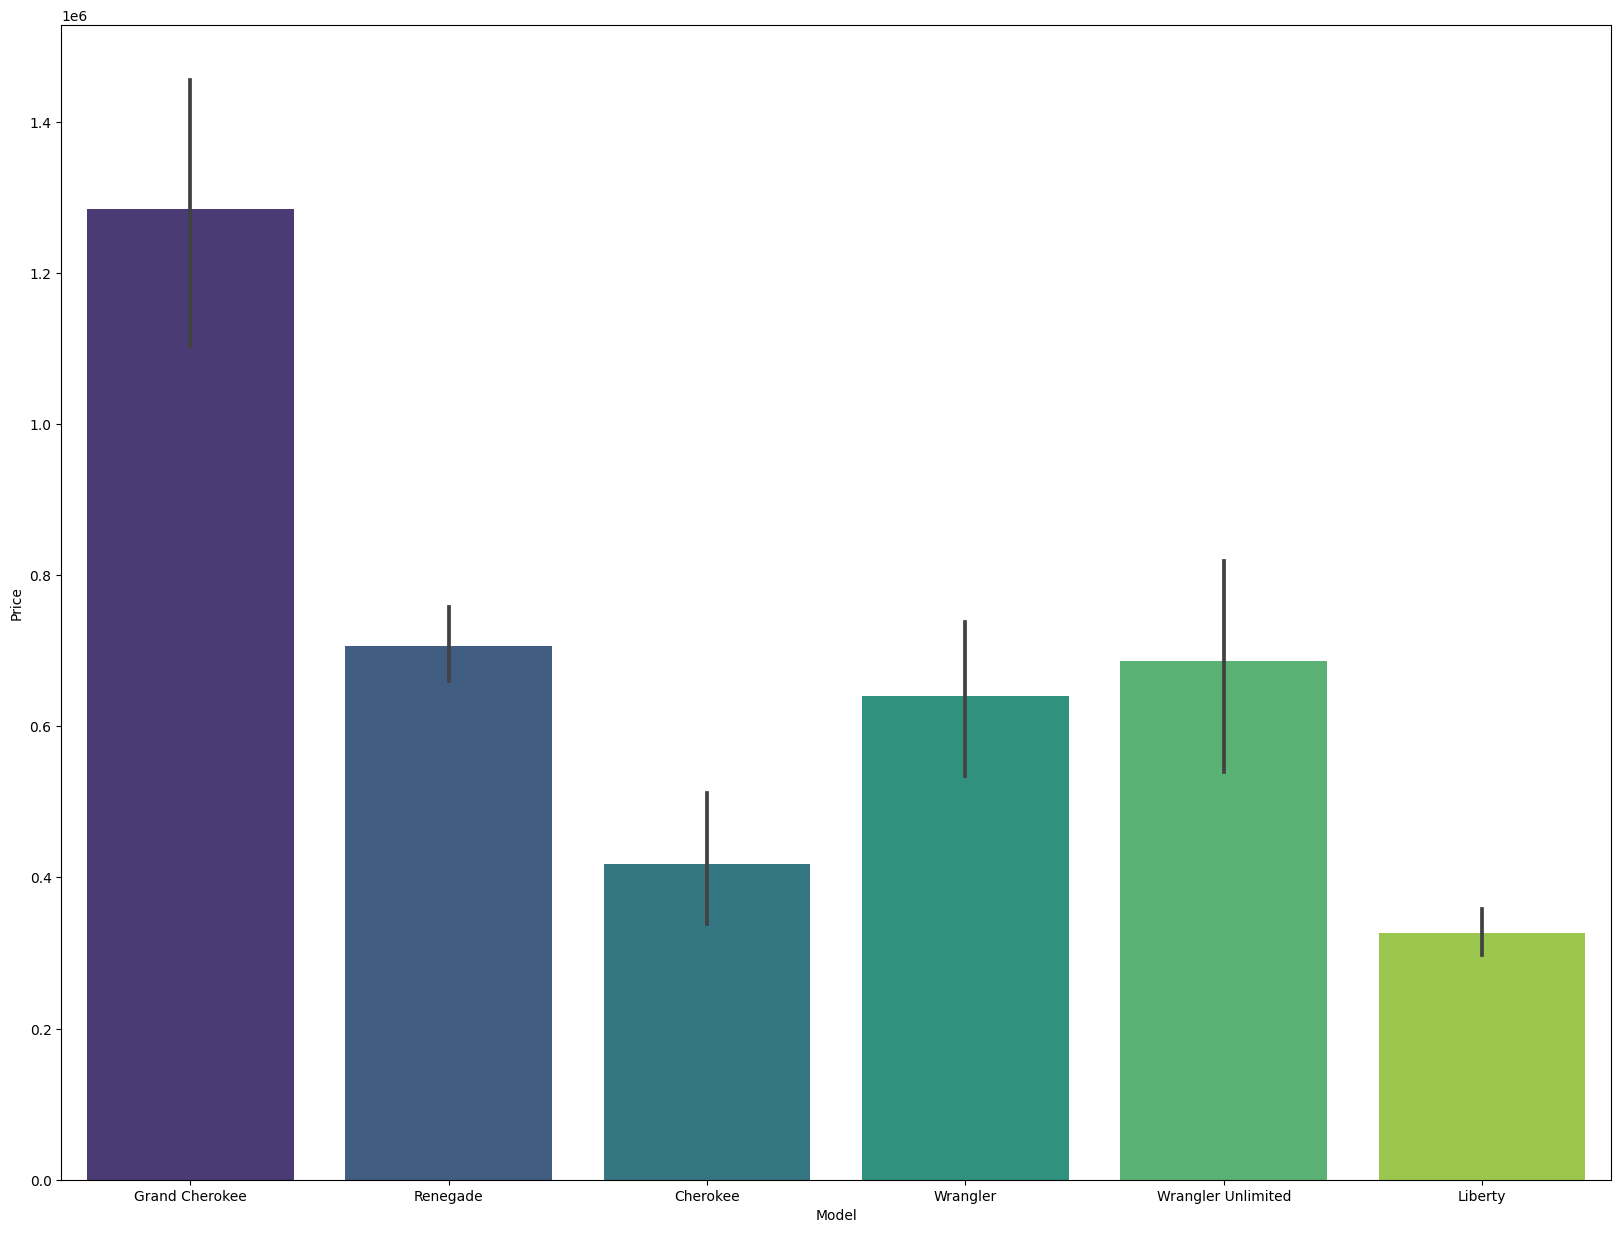

In [83]:
#explore model prices
df2 = df[df['Make'] == 'Jeep']
    
plt.figure(figsize=(20,15))
sns.barplot(x = df2["Model"], y = df2["Price"] , palette='viridis')

In [95]:
names={}
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        df2 = df1[df1['Year'] == y]
        p = (df2['Price'].max())-(df2['Price'].min())
        names[m+'  '+str(y)] = p

In [96]:
sorted_ = sorted(names.items(), key=lambda x:x[1], reverse=True)
sorted_

[('Accent RB  2015.0', 3350000.0),
 ('E 300  2021.0', 2630000.0),
 ('Velar  2021.0', 2150000.0),
 ('E 200 AMG  2020.0', 1920000.0),
 ('E 200  2020.0', 1650000.0),
 ('CLA 180  2022.0', 1450000.0),
 ('C 180  2021.0', 1380000.0),
 ('X6  2019.0', 1350000.0),
 ('A5  2020.0', 1220000.0),
 ('E 300  2020.0', 1200000.0),
 ('Tucson  2021.0', 1195000.0),
 ('E 200  2021.0', 1150000.0),
 ('C 200  2019.0', 1140000.0),
 ('3008  2021.0', 1113000.0),
 ('Corolla  2022.0', 1100000.0),
 ('Tucson  2019.0', 1100000.0),
 ('E 200  2022.0', 1020000.0),
 ('C 180  2019.0', 1000000.0),
 ('Superb  2021.0', 990000.0),
 ('Kodiaq  2020.0', 970000.0),
 ('Octavia A8  2022.0', 921000.0),
 ('530  2019.0', 900000.0),
 ('Passat  2019.0', 890000.0),
 ('Sportage  2022.0', 855000.0),
 ('508  2020.0', 800000.0),
 ('GLC 200  2021.0', 800000.0),
 ('X5  2018.0', 800000.0),
 ('320  2018.0', 790000.0),
 ('508  2022.0', 775000.0),
 ('D max  2022.0', 755000.0),
 ('Kodiaq  2021.0', 750000.0),
 ('Fortuner  2015.0', 750000.0),
 ('218 i 

In [84]:
#Selecting models from the same year with biggest gap between max and min price

names=[]
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        df2 = df1[df1['Year'] == y]
        p = (df2['Price'].max())-(df2['Price'].min())
        if p > 500000 :
            l = [m,y]
            names.append(l)

In [86]:
models_ = []
years_ =  []

for i in range(len(names)) :
    m = names[i][0]
    models_.append(m)
    
for i in range(len(names)) :
    y = names[i][1]
    years_.append(y)   

In [88]:
#selecting the max and the min and their indexes

import itertools
cars6 = []
for (m, y) in itertools.zip_longest(models_, years_):
    df1 = df[df['Model'] == m]
    df2 = df1[df1['Year'] == y]
    mx = df2['Price'].max()
    i1 = str(df2[df2['Price']==mx].index.values)  
    mi = df2['Price'].min()
    i2 = str(df2[df2['Price']==mi].index.values)  
    l = [m,y,i1,mx,i2,mi]
    cars6.append(l)

In [92]:
df1 = df[(df['Model'] == 'Accent RB')&(df['Year']==2015)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
640,Hyundai,Accent RB,2015.0,123000.0,automatic,gas,360000.0
813,Hyundai,Accent RB,2015.0,200000.0,automatic,gas,370000.0
836,Hyundai,Accent RB,2015.0,95000.0,automatic,gas,380000.0
1492,Hyundai,Accent RB,2015.0,95000.0,automatic,gas,350000.0
1632,Hyundai,Accent RB,2015.0,83000.0,automatic,gas,3600000.0
1861,Hyundai,Accent RB,2015.0,124000.0,automatic,gas,320000.0
2849,Hyundai,Accent RB,2015.0,120000.0,automatic,gas,335000.0
2869,Hyundai,Accent RB,2015.0,164000.0,automatic,gas,315000.0
3328,Hyundai,Accent RB,2015.0,130000.0,automatic,gas,365000.0
5167,Hyundai,Accent RB,2015.0,80000.0,automatic,gas,390000.0


In [97]:
df.loc[1632,['Price']] = [360000.0]

In [98]:
df1 = df[(df['Model'] == 'Velar')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
4288,Land Rover,Velar,2021.0,48482.465037,automatic,gas,650000.0
13831,Land Rover,Velar,2021.0,29000.000000,automatic,gas,2800000.0


In [99]:
df = df.drop(4288)

In [100]:
df1 = df[(df['Model'] == 'E 300')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
5264,Mercedes,E 300,2021.0,9000.0,automatic,gas,270000.0
7203,Mercedes,E 300,2021.0,22000.0,automatic,gas,2650000.0
7526,Mercedes,E 300,2021.0,4800.0,automatic,gas,2750000.0
13099,Mercedes,E 300,2021.0,25550.0,automatic,gas,2900000.0
16705,Mercedes,E 300,2021.0,19000.0,automatic,gas,2900000.0
17877,Mercedes,E 300,2021.0,11000.0,automatic,gas,2650000.0
17948,Mercedes,E 300,2021.0,8000.0,automatic,gas,2650000.0


In [101]:
df.loc[5246,['Price']] = [2700000.0]

In [102]:
df1 = df[(df['Model'] == 'E 200 AMG')&(df['Year']==2020)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
12872,Mercedes,E 200 AMG,2020.0,17000.0,automatic,gas,480000.0
12896,Mercedes,E 200 AMG,2020.0,75000.0,automatic,gas,2400000.0


In [103]:
df.loc[12872,['Price']] = [2480000.0]

In [105]:
df1 = df[(df['Model'] == 'E 200')&(df['Year']==2020)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
80,Mercedes,E 200,2020.0,28000.0,automatic,gas,2480000.0
2405,Mercedes,E 200,2020.0,28000.0,automatic,gas,3500000.0
2525,Mercedes,E 200,2020.0,25000.0,automatic,gas,2450000.0
3954,Mercedes,E 200,2020.0,120000.0,manual,gas,2000000.0
5072,Mercedes,E 200,2020.0,62000.0,automatic,gas,2300000.0
5434,Mercedes,E 200,2020.0,25000.0,automatic,gas,2150000.0
8312,Mercedes,E 200,2020.0,37000.0,automatic,gas,2000000.0
11162,Mercedes,E 200,2020.0,75000.0,automatic,gas,2390000.0
11309,Mercedes,E 200,2020.0,40000.0,automatic,gas,2400000.0
13674,Mercedes,E 200,2020.0,7500.0,automatic,gas,2700000.0


In [106]:
df = df.drop(2405)

In [108]:
df1 = df[(df['Model'] == 'CLA 180')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
4287,Mercedes,CLA 180,2022.0,10000.000000,automatic,gas,300000.0
14214,Mercedes,CLA 180,2022.0,24225.710052,automatic,gas,1750000.0


In [109]:
df.loc[4287,['Price']] = [1300000.0]

In [111]:
df1 = df[(df['Model'] == 'A5')]#&(df['Year']==2023)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1442,Chery,A5,2020.0,66000.0,manual,gas,280000.0
2037,Chery,A5,2021.0,85000.0,automatic,gas,310000.0
3567,Audi,A5,2019.0,40000.0,automatic,gas,1750000.0
4928,Chery,A5,2022.0,21000.0,automatic,gas,400000.0
5462,Chery,A5,2022.0,73000.0,automatic,gas,370000.0
5621,Chery,A5,2022.0,16000.0,automatic,gas,395000.0
7685,Chery,A5,2021.0,70000.0,automatic,gas,410000.0
8634,Audi,A5,2019.0,28000.0,automatic,gas,1220000.0
8914,Chery,A5,2021.0,38000.0,automatic,gas,340000.0
9976,Audi,A5,2019.0,59000.0,automatic,gas,1425000.0


In [112]:
df = df[df.Model != 'A5']

In [113]:
df1 = df[(df['Model'] == 'E 300')&(df['Year']==2020)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
12002,Mercedes,E 300,2020.0,64000.0,automatic,gas,1000000.0
15831,Mercedes,E 300,2020.0,50000.0,automatic,gas,2200000.0


In [56]:
df = df.drop(11773)

In [114]:
df1 = df[(df['Model'] == 'C 180')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1558,Mercedes,C 180,2021.0,10000.0,automatic,gas,1300000.0
10773,Mercedes,C 180,2021.0,18000.0,automatic,gas,1300000.0
11601,Mercedes,C 180,2021.0,15000.0,automatic,gas,2000000.0
15177,Mercedes,C 180,2021.0,135000.0,automatic,gas,620000.0


In [115]:
df.loc[15177,['Price']] = [1620000]

In [62]:
df.loc[27298,['Price']] = [1360000]

In [117]:
df1 = df[(df['Model'] == 'X6')&(df['Year']==2019)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
5669,BMW,X6,2019.0,60000.0,automatic,gas,3500000.0
8118,BMW,X6,2019.0,112000.0,automatic,gas,2400000.0
11899,BMW,X6,2019.0,36000.0,automatic,gas,2750000.0
15840,BMW,X6,2019.0,125000.0,automatic,gas,2150000.0
15930,BMW,X6,2019.0,30000.0,automatic,gas,2600000.0
17385,BMW,X6,2019.0,88000.0,automatic,gas,2500000.0


In [118]:
df = df.drop(5669)

In [119]:
df1 = df[(df['Model'] == 'C 200')&(df['Year']==2019)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
3869,Mercedes,C 200,2019.0,200000.0,automatic,gas,610000.0
4794,Mercedes,C 200,2019.0,40000.0,automatic,gas,1580000.0
8677,Mercedes,C 200,2019.0,92000.0,automatic,gas,1450000.0
8811,Mercedes,C 200,2019.0,53000.0,automatic,gas,1750000.0
9820,Mercedes,C 200,2019.0,62000.0,automatic,gas,1550000.0
12256,Mercedes,C 200,2019.0,30000.0,automatic,gas,1580000.0
15429,Mercedes,C 200,2019.0,87000.0,automatic,gas,1700000.0
15571,Mercedes,C 200,2019.0,98000.0,automatic,gas,1440000.0
17592,Mercedes,C 200,2019.0,48000.0,automatic,gas,1500000.0
17606,Mercedes,C 200,2019.0,80000.0,automatic,gas,1400000.0


In [120]:
df.loc[3869,['Price']] = [1610000]

In [124]:
df1 = df[(df['Model'] == '3008')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
178,Peugeot,3008,2021.0,2900.0,automatic,gas,1580000.0
1670,Peugeot,3008,2021.0,20000.0,automatic,gas,1050000.0
1700,Peugeot,3008,2021.0,6000.0,automatic,gas,1070000.0
4653,Peugeot,3008,2021.0,8000.0,automatic,gas,1550000.0
6778,Peugeot,3008,2021.0,45000.0,automatic,gas,1150000.0
7656,Peugeot,3008,2021.0,26000.0,automatic,gas,1150000.0
7952,Peugeot,3008,2021.0,82000.0,automatic,gas,1050000.0
9505,Peugeot,3008,2021.0,20000.0,automatic,gas,1135000.0
9624,Peugeot,3008,2021.0,6000.0,automatic,gas,1050000.0
9681,Peugeot,3008,2021.0,15000.0,automatic,gas,1350000.0


In [125]:
df.loc[14453,['Price']] = [1467000.0]

In [126]:
df1 = df[(df['Model'] == 'Fortuner')&(df['Year']==2015)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
7396,Toyota,Fortuner,2015.0,339000.0,automatic,gas,350000.0
14083,Toyota,Fortuner,2015.0,100000.0,automatic,gas,1100000.0
16510,Toyota,Fortuner,2015.0,95000.0,automatic,gas,880000.0


In [127]:
df.loc[7396,['Price']] = [1350000.0]

In [128]:
df1 = df[(df['Model'] == 'Passat')&(df['Year']==2019)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
360,Volkswagen,Passat,2019.0,90000.0,automatic,gas,110000.0
4504,Volkswagen,Passat,2019.0,47000.0,automatic,gas,980000.0
4791,Volkswagen,Passat,2019.0,100000.0,automatic,gas,910000.0
7254,Volkswagen,Passat,2019.0,98000.0,automatic,gas,780000.0
7959,Volkswagen,Passat,2019.0,89000.0,automatic,gas,760000.0
9703,Volkswagen,Passat,2019.0,40000.0,automatic,gas,1000000.0
13239,Volkswagen,Passat,2019.0,85000.0,automatic,gas,820000.0
14503,Volkswagen,Passat,2019.0,90000.0,automatic,gas,800000.0
16828,Volkswagen,Passat,2019.0,115000.0,automatic,gas,690000.0
17558,Volkswagen,Passat,2019.0,90000.0,automatic,gas,750000.0


In [129]:
df.loc[360,['Price']] = [1100000.0]

In [130]:
df1 = df[(df['Model'] == '508')&(df['Year']==2020)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
276,Peugeot,508,2020.0,60000.0,automatic,gas,400000.0
343,Peugeot,508,2020.0,70000.0,automatic,gas,820000.0
913,Peugeot,508,2020.0,122000.0,automatic,gas,950000.0
2448,Peugeot,508,2020.0,60000.0,automatic,gas,965000.0
3337,Peugeot,508,2020.0,30000.0,automatic,gas,1150000.0
3876,Peugeot,508,2020.0,77000.0,automatic,gas,850000.0
4138,Peugeot,508,2020.0,93000.0,automatic,gas,750000.0
4158,Peugeot,508,2020.0,77000.0,automatic,gas,920000.0
5110,Peugeot,508,2020.0,83000.0,automatic,gas,920000.0
7198,Peugeot,508,2020.0,75000.0,automatic,gas,870000.0


In [131]:
df = df.drop(276)

In [132]:
df1 = df[(df['Model'] == 'Tiggo 3')&(df['Year']==2023)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
145,Chery,Tiggo 3,2023.0,1980.0,automatic,gas,515000.0
712,Chery,Tiggo 3,2023.0,11000.0,automatic,gas,490000.0
1157,Chery,Tiggo 3,2023.0,5500.0,automatic,gas,510000.0
1234,Chery,Tiggo 3,2023.0,3000.0,automatic,gas,510000.0
2029,Chery,Tiggo 3,2023.0,1780.0,automatic,gas,550000.0
2050,Chery,Tiggo 3,2023.0,10000.0,automatic,gas,500000.0
3391,Chery,Tiggo 3,2023.0,20.0,automatic,gas,515000.0
5102,Chery,Tiggo 3,2023.0,900.0,automatic,gas,540000.0
5275,Chery,Tiggo 3,2023.0,4478.0,automatic,gas,515000.0
6633,Chery,Tiggo 3,2023.0,2000.0,automatic,gas,510000.0


In [133]:
df = df.drop(11754)

In [134]:
df1 = df[(df['Model'] == 'Hilux')&(df['Year']==2008)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2146,Toyota,Hilux,2008.0,130000.0,manual,diesel,165000.0
6764,Toyota,Hilux,2008.0,300000.0,manual,diesel,750000.0
16168,Toyota,Hilux,2008.0,5000.0,manual,diesel,110000.0


In [135]:
df = df.drop(6764)

In [137]:
df1 = df[(df['Make'] == 'Skoda')&(df['Price']<800000)&(df['Year']>2015)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
439,Skoda,Rapid,2016.0,140000.000000,automatic,gas,400000.0
775,Skoda,Superb,2018.0,120000.000000,automatic,gas,780000.0
1064,Skoda,Octavia A7,2016.0,97000.000000,automatic,gas,570000.0
1642,Skoda,Fabia,2017.0,140000.000000,automatic,gas,370000.0
1677,Skoda,Octavia A7,2019.0,100000.000000,automatic,gas,765000.0
2008,Skoda,Octavia A7,2016.0,135000.000000,automatic,gas,590000.0
2545,Skoda,Octavia A7,2016.0,129794.166976,automatic,gas,500000.0
3007,Skoda,Octavia A7,2016.0,197000.000000,automatic,gas,600000.0
3912,Skoda,Octavia A7,2016.0,145000.000000,automatic,gas,550000.0
4210,Skoda,Octavia A7,2016.0,50000.000000,automatic,gas,650000.0


In [138]:
df = df.drop(4229)

In [140]:
names={}
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        if y < 2015 :
            df2 = df1[df1['Year'] == y]
            p = (df2['Price'].max())-(df2['Price'].min())
            names[m+'  '+str(y)] = p

In [141]:
sorted_ = sorted(names.items(), key=lambda x:x[1], reverse=True)
sorted_

[('Spark  2011.0', 2565000.0),
 ('Elantra  2001.0', 728888.0),
 ('E 250  2010.0', 650000.0),
 ('320  2013.0', 625000.0),
 ('E 200  2014.0', 550000.0),
 ('Hilux  2010.0', 550000.0),
 ('Pajero  2011.0', 540000.0),
 ('X3  2013.0', 470000.0),
 ('320  2011.0', 450000.0),
 ('C 180  2014.0', 420000.0),
 ('320  2010.0', 415000.0),
 ('Cherokee  2011.0', 382000.0),
 ('Fortuner  2013.0', 360000.0),
 ('Corolla  2007.0', 335000.0),
 ('508  2014.0', 335000.0),
 ('Sunny  2011.0', 320000.0),
 ('E 300  2010.0', 300000.0),
 ('E 240  2004.0', 300000.0),
 ('E 250  2011.0', 300000.0),
 ('Sportage  2012.0', 295000.0),
 ('Cherokee  2013.0', 290000.0),
 ('E 200  2010.0', 275000.0),
 ('525  2010.0', 265000.0),
 ('B 200  2013.0', 260000.0),
 ('Wrangler  2011.0', 260000.0),
 ('523  2006.0', 260000.0),
 ('Fantasia  2010.0', 255000.0),
 ('Rio  2013.0', 255000.0),
 ('Pajero  2005.0', 250000.0),
 ('X3  2014.0', 250000.0),
 ('Jetta  2013.0', 245000.0),
 ('C 180  2009.0', 240000.0),
 ('IX 35  2014.0', 240000.0),
 ('Fa

In [ ]:
df1 = df[(df['Model'] == 'Spark')&(df['Year']==2011)]
df1

In [158]:
df1 = df[(df['Model'] == 'Elantra')&(df['Year']==2001)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2754,Hyundai,Elantra,2001.0,180000.0,automatic,gas,230000.0
13879,Hyundai,Elantra,2001.0,200000.0,manual,gas,160000.0
13925,Hyundai,Elantra,2001.0,148000.0,manual,natural gas,888888.0


In [159]:
df = df.drop(13925)

In [160]:
df1 = df[(df['Model'] == 'E 250')&(df['Year']==2010)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
4632,Mercedes,E 250,2010.0,80000.0,automatic,gas,950000.0
11789,Mercedes,E 250,2010.0,155000.0,automatic,gas,1150000.0
13240,Mercedes,E 250,2010.0,180000.0,automatic,gas,500000.0
16225,Mercedes,E 250,2010.0,216000.0,automatic,gas,850000.0
17453,Mercedes,E 250,2010.0,250000.0,automatic,gas,780000.0


In [161]:
df = df.drop(13240)

In [172]:
df1 = df[(df['Model'] == 'Sunny')&(df['Year']==2011)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
461,Nissan,Sunny,2011.0,94000.0,automatic,gas,300000.0
638,Nissan,Sunny,2011.0,143000.0,automatic,gas,270000.0
2998,Nissan,Sunny,2011.0,123000.0,automatic,gas,277000.0
4013,Nissan,Sunny,2011.0,340000.0,automatic,gas,195000.0
6431,Nissan,Sunny,2011.0,193000.0,automatic,gas,230000.0
6569,Nissan,Sunny,2011.0,106000.0,automatic,gas,265000.0
7146,Nissan,Sunny,2011.0,230000.0,automatic,gas,205000.0
7223,Nissan,Sunny,2011.0,130000.0,automatic,gas,335000.0
7466,Nissan,Sunny,2011.0,170000.0,automatic,gas,500000.0
9916,Nissan,Sunny,2011.0,135000.0,automatic,gas,308000.0


In [173]:
df = df.drop(7466)

In [174]:
df1 = df[(df['Model'] == 'Corolla')&(df['Year']==2007)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2129,Toyota,Corolla,2007.0,251000.0,manual,gas,300000.0
2170,Toyota,Corolla,2007.0,235000.0,automatic,gas,345000.0
3260,Toyota,Corolla,2007.0,230000.0,automatic,gas,365000.0
4085,Toyota,Corolla,2007.0,340000.0,automatic,gas,350000.0
4569,Toyota,Corolla,2007.0,188000.0,automatic,gas,315000.0
7069,Toyota,Corolla,2007.0,340000.0,manual,gas,290000.0
7765,Toyota,Corolla,2007.0,217000.0,automatic,gas,280000.0
7999,Toyota,Corolla,2007.0,180000.0,manual,gas,350000.0
8589,Toyota,Corolla,2007.0,88000.0,automatic,gas,360000.0
8646,Toyota,Corolla,2007.0,60000.0,automatic,gas,520000.0


In [175]:
df = df.drop(8646)

In [176]:
df1 = df[(df['Model'] == '508')&(df['Year']==2014)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
5359,Peugeot,508,2014.0,125000.0,automatic,gas,450000.0
7055,Peugeot,508,2014.0,155000.0,automatic,gas,430000.0
8999,Peugeot,508,2014.0,152000.0,automatic,gas,420000.0
9293,Peugeot,508,2014.0,138000.0,automatic,gas,415000.0
10760,Peugeot,508,2014.0,117000.0,automatic,gas,680000.0
13094,Peugeot,508,2014.0,123000.0,automatic,gas,430000.0
15062,Peugeot,508,2014.0,200000.0,automatic,gas,390000.0
17905,Peugeot,508,2014.0,235000.0,automatic,gas,345000.0


In [177]:
df = df.drop(10760)

In [151]:
df1 = df[(df['Model'] == 'Tipo')&(df['Year']==1990)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
15476,Fiat,Tipo,1990.0,70000.0,manual,gas,350000.0


In [152]:
df = df.drop(15476)

In [153]:
df1 = df[(df['Model'] == 'Pickup')]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
597,Suzuki,Pickup,2015.0,8000.000000,manual,gas,135000.0
737,Mitsubishi,Pickup,1991.0,100000.000000,manual,gas,50000.0
786,Chevrolet,Pickup,2022.0,24000.000000,manual,diesel,520000.0
1222,Chevrolet,Pickup,2018.0,335000.000000,manual,diesel,330000.0
1463,Chevrolet,Pickup,2001.0,200000.000000,manual,diesel,140000.0
...,...,...,...,...,...,...,...
15999,Suzuki,Pickup,2015.0,1000.000000,manual,gas,110000.0
16624,Chevrolet,Pickup,1982.0,49240.961905,manual,diesel,60000.0
17353,Chevrolet,Pickup,2015.0,80000.000000,manual,diesel,350000.0
17912,Mitsubishi,Pickup,2013.0,156000.000000,manual,diesel,300000.0


In [154]:
df = df[df.Model != 'Pickup']

In [155]:
df1 = df[(df['Model'] == 'Soul')&(df['Year']==2010)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1679,Kia,Soul,2010.0,90000.0,automatic,gas,245000.0
3385,Kia,Soul,2010.0,130000.0,automatic,gas,320000.0
4056,Kia,Soul,2010.0,210000.0,automatic,gas,310000.0
4116,Kia,Soul,2010.0,160000.0,automatic,gas,360000.0
4567,Kia,Soul,2010.0,86000.0,automatic,gas,380000.0
4580,Kia,Soul,2010.0,162000.0,automatic,gas,420000.0
9258,Kia,Soul,2010.0,127000.0,automatic,gas,350000.0
10594,Kia,Soul,2010.0,170000.0,automatic,gas,315000.0
11926,Kia,Soul,2010.0,127000.0,automatic,gas,330000.0
13683,Kia,Soul,2010.0,117000.0,automatic,gas,320000.0


In [156]:
df = df.drop(1679)

In [178]:
names={}
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        if y < 2015 :
            df2 = df1[df1['Year'] == y]
            p = (df2['Price'].max())-(df2['Price'].min())
            names[m+'  '+str(y)] = p

In [179]:
sorted_ = sorted(names.items(), key=lambda x:x[1], reverse=True)
sorted_

[('E 200  2014.0', 550000.0),
 ('X3  2013.0', 470000.0),
 ('C 180  2014.0', 420000.0),
 ('Cherokee  2011.0', 382000.0),
 ('E 250  2010.0', 370000.0),
 ('Fortuner  2013.0', 360000.0),
 ('E 300  2010.0', 300000.0),
 ('E 240  2004.0', 300000.0),
 ('E 250  2011.0', 300000.0),
 ('Sportage  2012.0', 295000.0),
 ('Cherokee  2013.0', 290000.0),
 ('E 200  2010.0', 275000.0),
 ('525  2010.0', 265000.0),
 ('B 200  2013.0', 260000.0),
 ('Wrangler  2011.0', 260000.0),
 ('523  2006.0', 260000.0),
 ('Fantasia  2010.0', 255000.0),
 ('Rio  2013.0', 255000.0),
 ('Pajero  2005.0', 250000.0),
 ('X3  2014.0', 250000.0),
 ('Jetta  2013.0', 245000.0),
 ('C 180  2009.0', 240000.0),
 ('IX 35  2014.0', 240000.0),
 ('Fantasia  2011.0', 230000.0),
 ('Octavia A5  2006.0', 230000.0),
 ('X3  2010.0', 230000.0),
 ('316  2014.0', 230000.0),
 ('Octavia A7  2014.0', 230000.0),
 ('Insignia  2014.0', 230000.0),
 ('Grand Cherokee  2012.0', 225000.0),
 ('Corolla  2013.0', 220000.0),
 ('Sportage  2013.0', 220000.0),
 ('C 180

In [181]:
df1 = df[(df['Model'] == 'X3')&(df['Year']==2013)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1880,BMW,X3,2013.0,200000.000000,automatic,gas,800000.0
1931,BMW,X3,2013.0,230000.000000,automatic,gas,800000.0
3563,BMW,X3,2013.0,90000.000000,automatic,gas,1150000.0
3802,BMW,X3,2013.0,240000.000000,automatic,gas,800000.0
10183,BMW,X3,2013.0,152854.861111,automatic,gas,790000.0
12302,BMW,X3,2013.0,100000.000000,automatic,gas,760000.0
13695,BMW,X3,2013.0,305000.000000,automatic,gas,680000.0


In [182]:
df = df.drop(3563)

In [183]:
df1 = df[(df['Model'] == 'C 180')&(df['Year']==2014)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2052,Mercedes,C 180,2014.0,170000.0,automatic,gas,670000.0
12864,Mercedes,C 180,2014.0,45000.0,automatic,gas,1090000.0
16066,Mercedes,C 180,2014.0,81000.0,manual,gas,750000.0


In [184]:
df = df.drop(12864)

In [190]:
names={}
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        df2 = df1[df1['Year'] == y]
        p = (df2['Price'].max())-(df2['Price'].min())
        names[m+'  '+str(y)] = p

In [191]:
sorted_ = sorted(names.items(), key=lambda x:x[1], reverse=True)
sorted_

[('E 300  2021.0', 2630000.0),
 ('E 300  2020.0', 1200000.0),
 ('Tucson  2021.0', 1195000.0),
 ('E 200  2021.0', 1150000.0),
 ('Corolla  2022.0', 1100000.0),
 ('Tucson  2019.0', 1100000.0),
 ('E 200  2022.0', 1020000.0),
 ('C 180  2019.0', 1000000.0),
 ('Superb  2021.0', 990000.0),
 ('Kodiaq  2020.0', 970000.0),
 ('Octavia A8  2022.0', 921000.0),
 ('530  2019.0', 900000.0),
 ('Sportage  2022.0', 855000.0),
 ('E 200  2020.0', 850000.0),
 ('GLC 200  2021.0', 800000.0),
 ('X5  2018.0', 800000.0),
 ('320  2018.0', 790000.0),
 ('508  2022.0', 775000.0),
 ('D max  2022.0', 755000.0),
 ('Kodiaq  2021.0', 750000.0),
 ('218 i  2021.0', 750000.0),
 ('GLC 200  2022.0', 750000.0),
 ('X5  2020.0', 750000.0),
 ('C 180  2022.0', 720000.0),
 ('GLC 300  2020.0', 715000.0),
 ('C 180  2021.0', 700000.0),
 ('X5  2017.0', 700000.0),
 ('Tucson  2022.0', 690000.0),
 ('Tucson  2023.0', 665000.0),
 ('318  2018.0', 660000.0),
 ('C 180  2016.0', 650000.0),
 ('C 180  2018.0', 650000.0),
 ('C 200 AMG  2022.0', 650

In [192]:
df1 = df[(df['Model'] == 'E 300')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
5264,Mercedes,E 300,2021.0,9000.0,automatic,gas,270000.0
7203,Mercedes,E 300,2021.0,22000.0,automatic,gas,2650000.0
7526,Mercedes,E 300,2021.0,4800.0,automatic,gas,2750000.0
13099,Mercedes,E 300,2021.0,25550.0,automatic,gas,2900000.0
16705,Mercedes,E 300,2021.0,19000.0,automatic,gas,2900000.0
17877,Mercedes,E 300,2021.0,11000.0,automatic,gas,2650000.0
17948,Mercedes,E 300,2021.0,8000.0,automatic,gas,2650000.0


In [193]:
df.loc[5264,['Price']] = [2700000.0]

In [196]:
df1 = df[(df['Model'] == 'E 200')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
107,Mercedes,E 200,2021.0,15000.0,automatic,gas,3250000.0
113,Mercedes,E 200,2021.0,24000.0,automatic,gas,2950000.0
517,Mercedes,E 200,2021.0,4000.0,automatic,gas,2900000.0
2287,Mercedes,E 200,2021.0,46000.0,automatic,gas,2700000.0
4475,Mercedes,E 200,2021.0,19000.0,automatic,gas,3300000.0
5831,Mercedes,E 200,2021.0,57000.0,automatic,gas,2450000.0
8464,Mercedes,E 200,2021.0,25000.0,automatic,gas,2700000.0
13860,Mercedes,E 200,2021.0,39000.0,automatic,gas,2550000.0
15753,Mercedes,E 200,2021.0,15000.0,automatic,gas,2150000.0


In [197]:
df = df.drop(15753)

In [204]:
df1 = df[(df['Model'] == 'Corolla')&(df['Year']==2022)&(df['Price']<700000)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1979,Toyota,Corolla,2022.0,60000.0,automatic,gas,670000.0
4861,Toyota,Corolla,2022.0,50000.0,automatic,gas,100000.0
7441,Toyota,Corolla,2022.0,19000.0,automatic,gas,675000.0
13467,Toyota,Corolla,2022.0,45000.0,automatic,gas,680000.0
13832,Toyota,Corolla,2022.0,18000.0,automatic,gas,600000.0
14787,Toyota,Corolla,2022.0,17000.0,automatic,gas,650000.0
15414,Toyota,Corolla,2022.0,13000.0,automatic,gas,680000.0
16583,Toyota,Corolla,2022.0,2750.0,automatic,gas,675000.0
16751,Toyota,Corolla,2022.0,9500.0,automatic,gas,685000.0
18078,Toyota,Corolla,2022.0,49000.0,automatic,gas,640000.0


In [205]:
df = df.drop(4861)

In [209]:
df1 = df[(df['Model'] == 'Tucson')&(df['Year']==2019)&(df['Price']<800000)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
4152,Hyundai,Tucson,2019.0,100000.0,automatic,gas,200000.0
4418,Hyundai,Tucson,2019.0,150000.0,automatic,gas,770000.0
13402,Hyundai,Tucson,2019.0,113000.0,automatic,gas,770000.0
13731,Hyundai,Tucson,2019.0,63000.0,automatic,gas,750000.0
15847,Hyundai,Tucson,2019.0,120000.0,automatic,gas,685000.0
16335,Hyundai,Tucson,2019.0,40000.0,automatic,gas,760000.0
16453,Hyundai,Tucson,2019.0,66000.0,automatic,gas,720000.0
16799,Hyundai,Tucson,2019.0,61000.0,automatic,gas,725000.0
16985,Hyundai,Tucson,2019.0,75000.0,automatic,gas,755000.0
17521,Hyundai,Tucson,2019.0,30000.0,automatic,gas,750000.0


In [210]:
df = df.drop(4152)

In [211]:
df1 = df[(df['Model'] == 'E 200')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
5312,Mercedes,E 200,2022.0,9000.0,automatic,gas,1980000.0
11377,Mercedes,E 200,2022.0,9000.0,automatic,gas,2750000.0
14857,Mercedes,E 200,2022.0,120000.0,automatic,gas,3000000.0
17549,Mercedes,E 200,2022.0,340000.0,automatic,gas,2650000.0


In [212]:
df = df.drop(5312)

In [214]:
df1 = df[(df['Model'] == 'Superb')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
3402,Skoda,Superb,2021.0,15193.0,automatic,gas,1350000.0
3451,Skoda,Superb,2021.0,35000.0,automatic,gas,2050000.0
3570,Skoda,Superb,2021.0,50000.0,automatic,gas,1225000.0
3679,Skoda,Superb,2021.0,50000.0,automatic,gas,1300000.0
4611,Skoda,Superb,2021.0,71000.0,automatic,gas,1200000.0
10446,Skoda,Superb,2021.0,38000.0,automatic,gas,1130000.0
12260,Skoda,Superb,2021.0,50000.0,automatic,gas,1200000.0
13758,Skoda,Superb,2021.0,75000.0,automatic,gas,1235000.0
16563,Skoda,Superb,2021.0,30000.0,automatic,gas,1060000.0


In [215]:
df = df.drop(3451)

In [218]:
df1 = df[(df['Model'] == 'Octavia A8')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2979,Skoda,Octavia A8,2022.0,30000.0,automatic,gas,950000.0
3447,Skoda,Octavia A8,2022.0,1000.0,automatic,gas,950000.0
4237,Skoda,Octavia A8,2022.0,29500.0,automatic,gas,960000.0
4339,Skoda,Octavia A8,2022.0,10000.0,automatic,gas,1025000.0
4789,Skoda,Octavia A8,2022.0,240000.0,automatic,gas,1000020.0
4810,Skoda,Octavia A8,2022.0,70000.0,automatic,gas,879000.0
7005,Skoda,Octavia A8,2022.0,1100.0,automatic,gas,1050000.0
7126,Skoda,Octavia A8,2022.0,1000.0,automatic,gas,1040000.0
9522,Skoda,Octavia A8,2022.0,27000.0,automatic,gas,1150000.0
10445,Skoda,Octavia A8,2022.0,15000.0,automatic,gas,990000.0


In [219]:
df = df.drop(10931)

In [222]:
df1 = df[(df['Model'] == 'Sportage')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
559,Kia,Sportage,2022.0,9000.0,automatic,gas,950000.0
762,Kia,Sportage,2022.0,15000.0,automatic,gas,1150000.0
2277,Kia,Sportage,2022.0,65000.0,automatic,gas,975000.0
2284,Kia,Sportage,2022.0,9000.0,automatic,gas,950000.0
2394,Kia,Sportage,2022.0,45000.0,automatic,gas,1200000.0
3018,Kia,Sportage,2022.0,68000.0,automatic,gas,900000.0
3320,Kia,Sportage,2022.0,16000.0,automatic,gas,1050000.0
3333,Kia,Sportage,2022.0,2500.0,automatic,gas,1600000.0
3425,Kia,Sportage,2022.0,4000.0,automatic,gas,1050000.0
3779,Kia,Sportage,2022.0,38000.0,automatic,gas,895000.0


In [223]:
df = df.drop(3333)

In [226]:
df1 = df[(df['Model'] == '320')&(df['Year']==2018)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
3008,BMW,320,2018.0,74000.0,automatic,gas,1200000.0
3297,BMW,320,2018.0,68000.0,automatic,gas,1100000.0
4175,BMW,320,2018.0,99900.0,automatic,gas,410000.0
13092,BMW,320,2018.0,138000.0,automatic,gas,950000.0
13926,BMW,320,2018.0,108000.0,automatic,gas,1100000.0
13939,BMW,320,2018.0,90000.0,automatic,gas,900000.0
15091,BMW,320,2018.0,93000.0,automatic,gas,950000.0


In [227]:
df = df.drop(4175)

In [228]:
df1 = df[(df['Model'] == 'D max')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
3897,Isuzu,D max,2022.0,43000.0,automatic,diesel,900000.0
4255,Isuzu,D max,2022.0,30000.0,automatic,gas,800000.0
8183,Isuzu,D max,2022.0,300000.0,manual,diesel,145000.0
18082,Isuzu,D max,2022.0,14000.0,manual,diesel,780000.0


In [229]:
df = df.drop(8183)

In [230]:
df1 = df[(df['Model'] == '218 i')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
1479,BMW,218 i,2021.0,64000.0,automatic,gas,1250000.0
3161,BMW,218 i,2021.0,37000.0,automatic,gas,1270000.0
7216,BMW,218 i,2021.0,65000.0,automatic,gas,1200000.0
8437,BMW,218 i,2021.0,6000.0,automatic,gas,1150000.0
11396,BMW,218 i,2021.0,17000.0,automatic,gas,1250000.0
11956,BMW,218 i,2021.0,51000.0,automatic,gas,1225000.0
14560,BMW,218 i,2021.0,30000.0,automatic,gas,1750000.0
15464,BMW,218 i,2021.0,28000.0,automatic,gas,1000000.0


In [231]:
df = df.drop(14560)

In [238]:
df1 = df[(df['Model'] == 'Tipo')&(df['Year']==2020)&(df['Price']>500000)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
437,Fiat,Tipo,2020.0,47000.0,automatic,gas,550000.0
1067,Fiat,Tipo,2020.0,48000.0,automatic,gas,510000.0
2313,Fiat,Tipo,2020.0,60000.0,automatic,gas,580000.0
2383,Fiat,Tipo,2020.0,130000.0,automatic,gas,540000.0
3409,Fiat,Tipo,2020.0,127000.0,automatic,gas,520000.0
5050,Fiat,Tipo,2020.0,90000.0,automatic,gas,550000.0
5168,Fiat,Tipo,2020.0,65000.0,automatic,gas,600000.0
6160,Fiat,Tipo,2020.0,80000.0,automatic,gas,525000.0
6289,Fiat,Tipo,2020.0,75000.0,automatic,gas,510000.0
6859,Fiat,Tipo,2020.0,30000.0,automatic,gas,750000.0


In [239]:
df = df.drop(6859)

In [246]:
df1 = df[(df['Model'] == 'Qashqai')&(df['Year']==2018)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
450,Nissan,Qashqai,2018.0,148000.0,automatic,gas,520000.0
576,Nissan,Qashqai,2018.0,95000.0,automatic,gas,590000.0
630,Nissan,Qashqai,2018.0,70000.0,automatic,gas,610000.0
635,Nissan,Qashqai,2018.0,90000.0,automatic,gas,590000.0
722,Nissan,Qashqai,2018.0,64000.0,automatic,gas,590000.0
2710,Nissan,Qashqai,2018.0,100000.0,automatic,gas,590000.0
7020,Nissan,Qashqai,2018.0,124000.0,automatic,gas,575000.0
7411,Nissan,Qashqai,2018.0,85000.0,automatic,gas,700000.0
7465,Nissan,Qashqai,2018.0,55000.0,automatic,gas,550000.0
7513,Nissan,Qashqai,2018.0,125000.0,automatic,gas,590000.0


In [247]:
df = df.drop(9085)

In [241]:
df1 = df[(df['Model'] == 'Optra')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
152,Chevrolet,Optra,2022.0,5000.000000,automatic,gas,520000.0
474,Chevrolet,Optra,2022.0,31000.000000,automatic,gas,395000.0
527,Chevrolet,Optra,2022.0,23500.000000,automatic,gas,395000.0
2272,Chevrolet,Optra,2022.0,30000.000000,automatic,gas,385000.0
2733,Chevrolet,Optra,2022.0,19000.000000,automatic,gas,425000.0
2820,Chevrolet,Optra,2022.0,40000.000000,automatic,gas,420000.0
3249,Chevrolet,Optra,2022.0,1500.000000,automatic,gas,450000.0
4763,Chevrolet,Optra,2022.0,2000.000000,automatic,gas,435000.0
4939,Chevrolet,Optra,2022.0,30000.000000,automatic,gas,425000.0
5412,Chevrolet,Optra,2022.0,38000.000000,automatic,gas,400000.0


In [242]:
df.loc[9619,['Price']] = [340000.0]
df = df.drop(10672)

In [244]:
df1 = df[(df['Model'] == 'Astra')&(df['Year']==2021)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
647,Opel,Astra,2021.0,73493.0,automatic,gas,525000.0
854,Opel,Astra,2021.0,28000.0,automatic,gas,535000.0
1147,Opel,Astra,2021.0,47000.0,automatic,gas,500000.0
1589,Opel,Astra,2021.0,126000.0,automatic,gas,490000.0
1830,Opel,Astra,2021.0,25000.0,automatic,gas,590000.0
4766,Opel,Astra,2021.0,6000.0,automatic,gas,600000.0
5708,Opel,Astra,2021.0,70000.0,automatic,gas,575000.0
6745,Opel,Astra,2021.0,33000.0,automatic,gas,520000.0
7606,Opel,Astra,2021.0,75000.0,automatic,gas,485000.0
7883,Opel,Astra,2021.0,19000.0,automatic,gas,550000.0


In [245]:
df = df.drop(9923)

In [249]:
df1 = df[(df['Model'] == 'Tiggo')&(df['Year']==2023)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
769,Speranza,Tiggo,2023.0,18000.0,automatic,gas,585000.0
6477,Chery,Tiggo,2023.0,1827.0,automatic,gas,170000.0
14896,Chery,Tiggo,2023.0,2000.0,automatic,gas,550000.0


In [250]:
df = df.drop(6477)

In [251]:
df1 = df[(df['Model'] == 'Verna')&(df['Year']==2019)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
12103,Hyundai,Verna,2019.0,260000.0,manual,gas,580000.0
17012,Hyundai,Verna,2019.0,207000.0,manual,gas,215000.0


In [252]:
df = df.drop(12103)

In [254]:
df1 = df[(df['Model'] == 'Sunny')&(df['Year']==2022)&(df['Price']<300000)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
6494,Nissan,Sunny,2022.0,44000.0,automatic,gas,90000.0
7080,Nissan,Sunny,2022.0,60000.0,manual,gas,180000.0


In [255]:
df = df.drop(6494)
df = df.drop(7080)

In [275]:
df1 = df[(df['Model'] == 'Elantra MD')&(df['Year']==2015)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
960,Hyundai,Elantra MD,2015.0,110000.0,automatic,gas,380000.0
2904,Hyundai,Elantra MD,2015.0,170000.0,automatic,gas,400000.0
3744,Hyundai,Elantra MD,2015.0,185000.0,automatic,gas,395000.0
3849,Hyundai,Elantra MD,2015.0,92000.0,automatic,gas,340000.0
4330,Hyundai,Elantra MD,2015.0,190000.0,automatic,gas,280000.0
4354,Hyundai,Elantra MD,2015.0,244000.0,automatic,gas,390000.0
4613,Hyundai,Elantra MD,2015.0,270000.0,automatic,gas,450000.0
6068,Hyundai,Elantra MD,2015.0,90000.0,automatic,gas,425000.0
6193,Hyundai,Elantra MD,2015.0,200000.0,automatic,gas,90000.0
6712,Hyundai,Elantra MD,2015.0,113000.0,automatic,gas,460000.0


In [276]:
df = df.drop(6193)

In [283]:
df1 = df[(df['Model'] == 'Arrizo 5')&(df['Year']==2023)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
159,Chery,Arrizo 5,2023.0,3900.0,automatic,gas,435000.0
832,Chery,Arrizo 5,2023.0,171.0,automatic,gas,425000.0
1237,Chery,Arrizo 5,2023.0,90.0,automatic,gas,437000.0
1737,Chery,Arrizo 5,2023.0,1500.0,automatic,gas,450000.0
1960,Chery,Arrizo 5,2023.0,25.0,automatic,gas,430000.0
2428,Chery,Arrizo 5,2023.0,4500.0,manual,gas,350000.0
3880,Chery,Arrizo 5,2023.0,20.0,automatic,gas,440000.0
4851,Chery,Arrizo 5,2023.0,1500.0,automatic,gas,420000.0
4855,Chery,Arrizo 5,2023.0,10.0,manual,gas,375000.0
4912,Chery,Arrizo 5,2023.0,300.0,manual,gas,360000.0


In [285]:
df1 = df[(df['Model'] == 'Sandero')&(df['Year']==2019)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
2054,Renault,Sandero,2019.0,40000.0,automatic,gas,400000.0
13123,Renault,Sandero,2019.0,27000.0,automatic,gas,58000.0


In [286]:
df.loc[9619,['Price']] = [580000.0]

In [287]:
df1 = df[(df['Model'] == 'Sentra')&(df['Year']==2022)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
365,Nissan,Sentra,2022.0,32000.0,automatic,gas,598000.0
9642,Nissan,Sentra,2022.0,7000.0,automatic,gas,580000.0
9744,Nissan,Sentra,2022.0,26000.0,automatic,gas,600000.0
12387,Nissan,Sentra,2022.0,70000.0,automatic,gas,260000.0


In [288]:
df = df.drop(12387)

In [312]:
df1 = df[(df['Model'] == '308')&(df['Year']==2016)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
6332,Peugeot,308,2016.0,120000.0,automatic,gas,350000.0
13192,Peugeot,308,2016.0,45000.0,automatic,gas,660000.0


In [313]:
df = df.drop(13192)

In [314]:
df1 = df[(df['Model'] == 'Elantra AD')&(df['Year']==2017)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
621,Hyundai,Elantra AD,2017.0,190000.0,automatic,gas,470000.0
1464,Hyundai,Elantra AD,2017.0,125000.0,automatic,gas,585000.0
1588,Hyundai,Elantra AD,2017.0,129000.0,automatic,gas,475000.0
3198,Hyundai,Elantra AD,2017.0,120000.0,automatic,gas,450000.0
3581,Hyundai,Elantra AD,2017.0,45000.0,automatic,gas,470000.0
4002,Hyundai,Elantra AD,2017.0,171000.0,automatic,gas,490000.0
4062,Hyundai,Elantra AD,2017.0,188000.0,automatic,gas,450000.0
4452,Hyundai,Elantra AD,2017.0,140000.0,automatic,gas,485000.0
8049,Hyundai,Elantra AD,2017.0,100000.0,automatic,gas,480000.0
9114,Hyundai,Elantra AD,2017.0,190000.0,automatic,gas,390000.0


In [315]:
df = df.drop(9570)

In [320]:
df1 = df[(df['Model'] == 'Sunny')&(df['Year']==2023)&(df['Price']<400000)]
df1

,Make,Model,Year,Km,Transmission,Fuel,Price
827,Nissan,Sunny,2023.0,80000.0,automatic,gas,375000.0
5576,Nissan,Sunny,2023.0,29000.0,automatic,gas,245000.0
7700,Nissan,Sunny,2023.0,22000.0,automatic,gas,360000.0
10872,Nissan,Sunny,2023.0,29000.0,automatic,gas,375000.0
12504,Nissan,Sunny,2023.0,18000.0,automatic,gas,380000.0
12907,Nissan,Sunny,2023.0,20000.0,automatic,gas,380000.0
14013,Nissan,Sunny,2023.0,5000.0,automatic,gas,368000.0
14517,Nissan,Sunny,2023.0,18000.0,automatic,gas,350000.0
15798,Nissan,Sunny,2023.0,30000.0,automatic,gas,330000.0
17834,Nissan,Sunny,2023.0,6000.0,automatic,gas,375000.0


In [321]:
df = df.drop(5576)

In [327]:
names={}
for m in df['Model'].unique().tolist():
    df1 = df[df['Model'] == m]
    for y in df1['Year'].unique().tolist():
        df2 = df1[df1['Year'] == y]
        p = (df2['Price'].max())-(df2['Price'].min())
        names[m+'  '+str(y)] = p

In [328]:
sorted_ = sorted(names.items(), key=lambda x:x[1], reverse=True)
sorted_

[('C 180  2019.0', 1000000.0),
 ('E 200  2020.0', 850000.0),
 ('E 200  2021.0', 850000.0),
 ('GLC 200  2021.0', 800000.0),
 ('X5  2018.0', 800000.0),
 ('508  2022.0', 775000.0),
 ('Kodiaq  2021.0', 750000.0),
 ('GLC 200  2022.0', 750000.0),
 ('X5  2020.0', 750000.0),
 ('C 180  2022.0', 720000.0),
 ('GLC 300  2020.0', 715000.0),
 ('C 180  2021.0', 700000.0),
 ('X5  2017.0', 700000.0),
 ('Tucson  2022.0', 690000.0),
 ('Kodiaq  2020.0', 670000.0),
 ('Tucson  2023.0', 665000.0),
 ('318  2018.0', 660000.0),
 ('C 180  2016.0', 650000.0),
 ('C 180  2018.0', 650000.0),
 ('C 200 AMG  2022.0', 650000.0),
 ('Q7  2019.0', 650000.0),
 ('Sorento  2021.0', 650000.0),
 ('Octavia A8  2021.0', 640000.0),
 ('Xceed  2022.0', 640000.0),
 ('Elantra CN7  2022.0', 635000.0),
 ('3008  2021.0', 630000.0),
 ('Tucson  2021.0', 630000.0),
 ('Octavia A8  2022.0', 621000.0),
 ('Tucson  2019.0', 615000.0),
 ('318  2019.0', 610000.0),
 ('Sportage  2022.0', 605000.0),
 ('Corolla  2022.0', 600000.0),
 ('Qashqai  2021.0'

In [334]:
df.shape

(18204, 7)

In [332]:
df.to_csv("final-step.csv",index=False)